In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from data_utils import *

from scipy import stats
import seaborn as sb
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf

'''
None || 20000 || 100000
'''
nb = None
nb_trains = nb
nb_valids = nb
nb_tests = nb

N_past = 10

In [2]:
# from google.colab import drive
# drive.mount('/content/drive/')

In [3]:
# cd drive/MyDrive/Projects/JPX_Tokyo_Stock/working


#### Load Data

In [4]:
train_df = pd.read_csv('../__input__/2_after_featureEgineering/' + str(N_past) + '/train_full.csv', parse_dates=['Date'], nrows = nb_trains)
valid_df = pd.read_csv('../__input__/2_after_featureEgineering/' + str(N_past) + '/valid_full.csv', parse_dates=['Date'], nrows = nb_valids)
test_df = pd.read_csv('../__input__/2_after_featureEgineering/' + str(N_past) + '/test_full.csv', parse_dates=['Date'], nrows = nb_tests)
y_test_df = pd.read_csv('../__input__/2_after_featureEgineering/' + str(N_past) + '/y_test_full.csv', parse_dates=['Date'], nrows = nb_tests)

official_test_df = pd.read_csv('../__input__/jpx-tokyo-stock-exchange-prediction/example_test_files/stock_prices.csv', nrows = None, parse_dates=['Date'])

In [5]:
mini_train_after_dataPreprocessing = pd.read_csv('../__input__/1_after_datapreprocessing/mini_train.csv', parse_dates=['Date'], nrows = None)
mini_train_after_featureEngineering = pd.read_csv('../__input__/2_after_featureEgineering/' + str(N_past) + '/mini_train.csv', parse_dates=['Date'], nrows = None)

In [6]:
official_test_df = FeatureEgineering_for_official_test(DataPreprocessing_for_official_test(official_test_df, mini_train_after_dataPreprocessing), mini_train_after_featureEngineering, N_past)

/mnt/ee1bd79c-6956-419b-951b-4699528687d7/Project/3. VDT miniPJ/working/data_utils.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_return['ExpectedDividend'] = df_return['ExpectedDividend'].fillna(-1)
/home/kienanh/miniconda3/envs/env/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4573509 entries, 0 to 4573508
Data columns (total 64 columns):
 #   Column              Dtype         
---  ------              -----         
 0   Date                datetime64[ns]
 1   SecuritiesCode      int64         
 2   Volume              float64       
 3   AdjustmentFactor    float64       
 4   ExpectedDividend    float64       
 5   SupervisionFlag     bool          
 6   Target              float64       
 7   CloseT2             float64       
 8   Close               float64       
 9   CloseT1             float64       
 10  Range_HL            float64       
 11  Range_OC            float64       
 12  dayofyear           int64         
 13  dayofweek           int64         
 14  week                int64         
 15  is_month_end        bool          
 16  is_month_start      bool          
 17  is_year_end         bool          
 18  is_year_start       bool          
 19  Year                int64         
 20  Mo

In [8]:
valid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233223 entries, 0 to 233222
Data columns (total 64 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Date                233223 non-null  datetime64[ns]
 1   SecuritiesCode      233223 non-null  int64         
 2   Volume              233223 non-null  float64       
 3   AdjustmentFactor    233223 non-null  float64       
 4   ExpectedDividend    233223 non-null  float64       
 5   SupervisionFlag     233223 non-null  bool          
 6   Target              233223 non-null  float64       
 7   CloseT2             233223 non-null  float64       
 8   Close               233223 non-null  float64       
 9   CloseT1             233223 non-null  float64       
 10  Range_HL            233223 non-null  float64       
 11  Range_OC            233223 non-null  float64       
 12  dayofyear           233223 non-null  int64         
 13  dayofweek           233223 no

In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229952 entries, 0 to 229951
Data columns (total 61 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Date                229952 non-null  datetime64[ns]
 1   SecuritiesCode      229952 non-null  int64         
 2   Volume              229952 non-null  float64       
 3   AdjustmentFactor    229952 non-null  float64       
 4   ExpectedDividend    229952 non-null  float64       
 5   SupervisionFlag     229952 non-null  bool          
 6   Close               229952 non-null  float64       
 7   Range_HL            229952 non-null  float64       
 8   Range_OC            229952 non-null  float64       
 9   dayofyear           229952 non-null  int64         
 10  dayofweek           229952 non-null  int64         
 11  week                229952 non-null  int64         
 12  is_month_end        229952 non-null  bool          
 13  is_month_start      229952 no

In [10]:
y_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229952 entries, 0 to 229951
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   SecuritiesCode  229952 non-null  int64         
 1   Date            229952 non-null  datetime64[ns]
 2   CloseT1         229952 non-null  float64       
 3   CloseT2         229952 non-null  float64       
 4   Target          229952 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 8.8 MB


In [11]:
official_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 61 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                4000 non-null   datetime64[ns]
 1   SecuritiesCode      4000 non-null   int64         
 2   Volume              4000 non-null   float64       
 3   AdjustmentFactor    4000 non-null   float64       
 4   ExpectedDividend    4000 non-null   float64       
 5   SupervisionFlag     4000 non-null   bool          
 6   Close               4000 non-null   float64       
 7   Range_HL            4000 non-null   float64       
 8   Range_OC            4000 non-null   float64       
 9   dayofyear           4000 non-null   int64         
 10  dayofweek           4000 non-null   int64         
 11  week                4000 non-null   UInt32        
 12  is_month_end        4000 non-null   bool          
 13  is_month_start      4000 non-null   bool        

In [12]:
train_df[train_df['SecuritiesCode']== 1301]

,Date,SecuritiesCode,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target,CloseT2,Close,CloseT1,...,Close_9_before,Range_HL_9_before,Range_OC_9_before,Volume_9_before,Close_10_before,Range_HL_10_before,Range_OC_10_before,Volume_10_before,Close_mean,Close_std
0,2017-01-19,1301,9.487972,1.0,-1.0,False,-0.006211,-0.115673,-1.037067,0.630218,...,0.674094,0.526511,0.219380,9.792556,0.849597,1.096898,-0.351007,10.354563,2722.636364,22.791545
1839,2017-01-20,1301,10.165852,1.0,-1.0,False,0.002574,0.863565,0.661128,0.549588,...,0.794976,1.070785,-0.267696,9.898475,0.705744,0.535392,0.223080,9.792556,2722.181818,22.413470
3684,2017-01-23,1301,9.441452,1.0,-1.0,False,0.001467,0.479752,-0.025031,0.296195,...,1.259870,0.871897,-0.137668,10.094108,0.892755,1.101343,-0.275336,9.898475,2720.545455,21.791575
5538,2017-01-24,1301,9.966462,1.0,-1.0,False,0.000732,0.650343,0.364192,0.554960,...,1.222646,0.715378,0.143076,9.137770,1.365721,0.906145,-0.143076,10.094108,2719.363636,20.967941
7389,2017-01-25,1301,9.622450,1.0,-1.0,False,-0.002195,0.478269,0.686624,0.790802,...,0.686624,2.291904,0.729242,10.264652,1.415866,0.781331,0.156266,9.137770,2717.818182,19.198011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2294945,2021-11-29,1301,9.568015,1.0,-1.0,False,0.003793,-2.532922,-1.764311,-2.744290,...,1.002688,0.864687,0.096076,8.922658,1.290917,1.441145,-1.441145,9.667765,3042.818182,52.041941
2296943,2021-11-30,1301,9.928180,1.0,-1.0,False,0.007558,-1.453579,-1.982285,-1.806050,...,1.542425,0.400535,-0.320428,9.011889,1.141889,0.720963,0.080107,8.922658,3023.727273,62.416490
2298937,2021-12-01,1301,9.268609,1.0,-1.0,False,0.016706,-0.379014,-1.455414,-1.121882,...,0.803510,1.061240,1.061240,8.881836,1.713144,0.379014,-0.303211,9.011889,3007.000000,65.960594
2300932,2021-12-02,1301,9.629051,1.0,-1.0,False,-0.003689,-0.330567,-0.991702,-0.139186,...,0.956905,0.782923,0.260974,9.581904,1.217879,1.217879,1.217879,8.881836,2990.000000,57.476952


#### EDA

In [13]:
def compare_gauss_dis(df_series: pd.Series, bins = 60):
    mu = df_series.mean()
    sigma = df_series.std()

    x = np.arange(df_series.min(), df_series.max(), (df_series.max() - df_series.min())/ 500)
    y = [1/np.sqrt(2*np.pi)/sigma*np.exp(-((i-mu)**2)/2/(sigma**2)) for i in x]
    gauss_df = pd.DataFrame({'x':x, 'y':y})

    ax = df_series.hist(bins= bins, density= True)
    gauss_df.plot(x='x', y='y', grid=True, ax=ax)
    plt.legend(['Gaussian fit'])
    plt.xlabel(df_series.name)
    plt.ylabel('Probability Density')
    plt.show()

    stats.probplot(df_series, dist="norm", plot=plt)
    plt.show()


Close

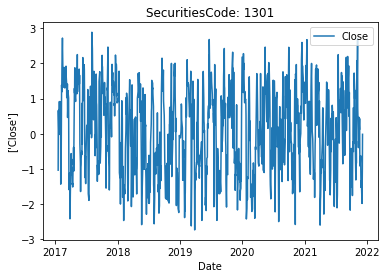

1191


In [14]:
render_col(train_df, 1301, ['Close'])

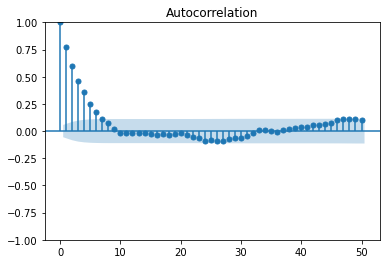

In [15]:
plot_acf(train_df['Close'][train_df['SecuritiesCode']== 1301].reset_index(drop = True), lags=50)
plt.show()

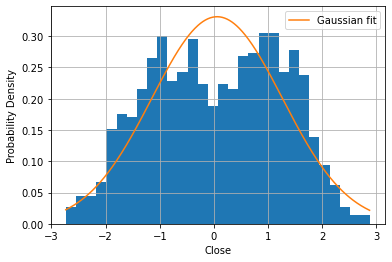

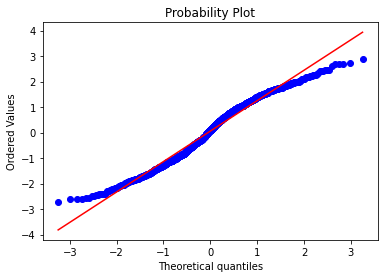

In [16]:
compare_gauss_dis(train_df['Close'][train_df['SecuritiesCode']== 1301].reset_index(drop = True), bins = 30)

In [17]:
adfuller(train_df['Close'][train_df['SecuritiesCode']== 1301].reset_index(drop = True))

(-12.271908954342896,
 8.602424303702822e-23,
 0,
 1190,
 {'1%': -3.4358571109034814,
  '5%': -2.8639718371916243,
  '10%': -2.56806475672622},
 2678.1027540248892)

=> Stationary

CloseT1, CloseT2

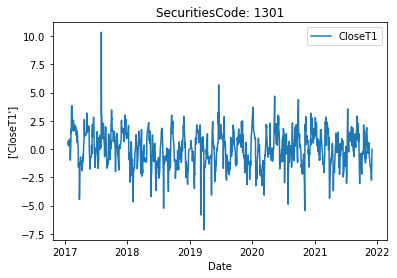

1191


In [18]:
render_col(train_df, 1301, ['CloseT1'])

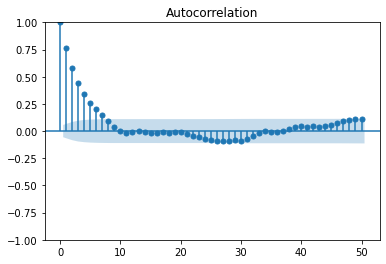

In [19]:
plot_acf(train_df['CloseT1'][train_df['SecuritiesCode']== 1301].reset_index(drop = True), lags=50)
plt.show()

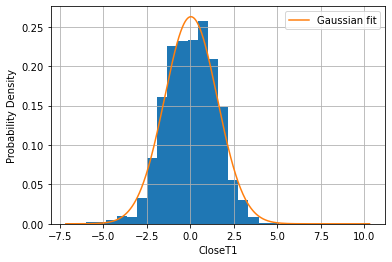

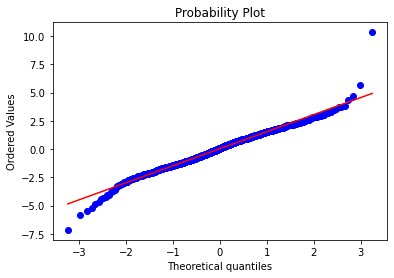

In [20]:
compare_gauss_dis(train_df['CloseT1'][train_df['SecuritiesCode']== 1301].reset_index(drop = True), bins = 30)

In [21]:
adfuller(train_df['CloseT1'][train_df['SecuritiesCode']== 1301].reset_index(drop = True))

(-12.545654805745777,
 2.2634948344048694e-23,
 0,
 1190,
 {'1%': -3.4358571109034814,
  '5%': -2.8639718371916243,
  '10%': -2.56806475672622},
 3265.204093805159)

=> Stationary

Volume

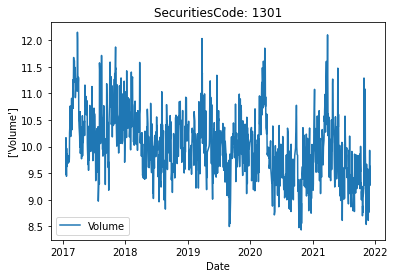

1191


In [22]:
render_col(train_df, 1301, ['Volume'])

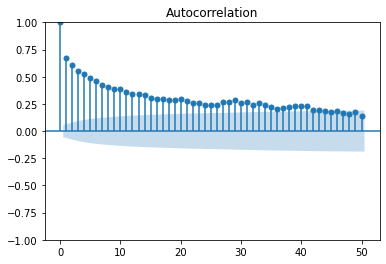

In [23]:
plot_acf(train_df['Volume'][train_df['SecuritiesCode']== 1301].reset_index(drop = True), lags=50)
plt.show()

In [24]:
new_vol = train_df['Volume'][train_df['SecuritiesCode']== 1301].reset_index(drop = True)

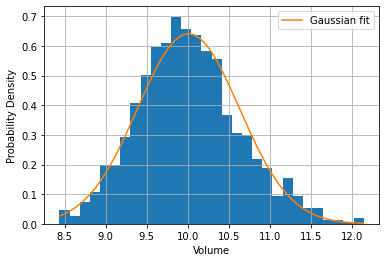

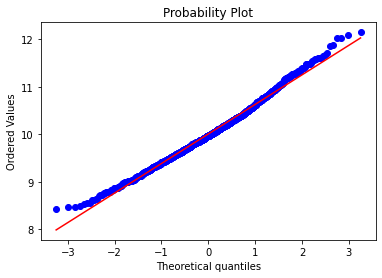

In [25]:
compare_gauss_dis(new_vol, bins = 30)

=> Stationary

Range_HL

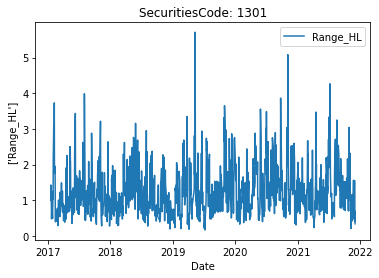

1191


In [26]:
render_col(train_df, 1301, ['Range_HL'])

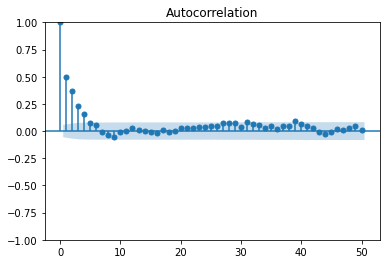

In [27]:
plot_acf(train_df['Range_HL'][train_df['SecuritiesCode']== 1301].reset_index(drop = True), lags=50)
plt.show()

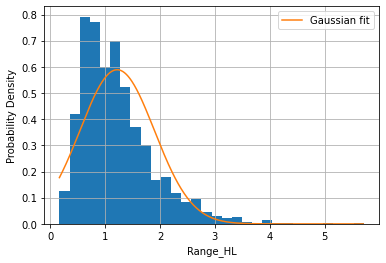

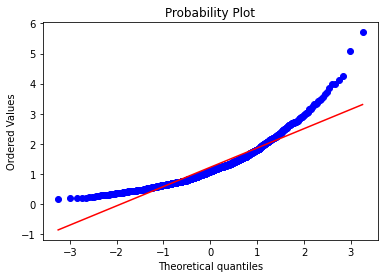

In [28]:
compare_gauss_dis(train_df['Range_HL'][train_df['SecuritiesCode']== 1301].reset_index(drop = True), bins = 30)

In [29]:
adfuller(train_df['Range_HL'][train_df['SecuritiesCode']== 1301].reset_index(drop = True))

(-14.689420156466044,
 3.0662270228585414e-27,
 1,
 1189,
 {'1%': -3.435861752677197,
  '5%': -2.8639738850277796,
  '10%': -2.568065847341873},
 2036.3491380760563)

=> Stationary

Range_OC

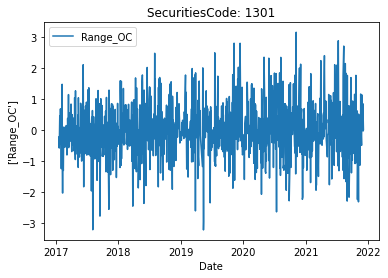

1191


In [30]:
render_col(train_df, 1301, ['Range_OC'])

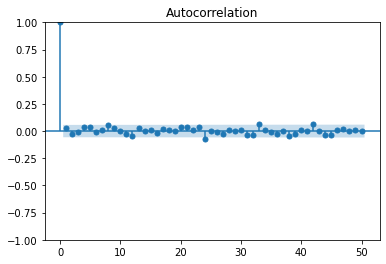

In [31]:
plot_acf(train_df['Range_OC'][train_df['SecuritiesCode']== 1301].reset_index(drop = True), lags=50)
plt.show()

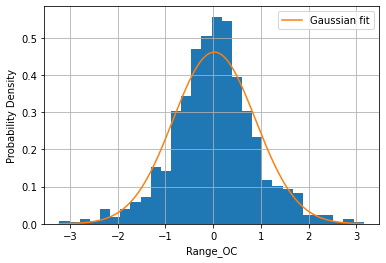

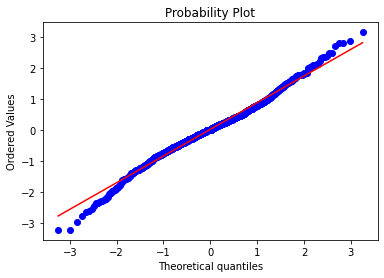

In [32]:
compare_gauss_dis(train_df['Range_OC'][train_df['SecuritiesCode']== 1301].reset_index(drop = True), bins = 30)

In [33]:
adfuller(train_df['Range_OC'][train_df['SecuritiesCode']== 1301].reset_index(drop = True))

(-33.521365382905834,
 0.0,
 0,
 1190,
 {'1%': -3.4358571109034814,
  '5%': -2.8639718371916243,
  '10%': -2.56806475672622},
 2971.8446421384056)

=> Stationary